In [74]:
# api 호출

import os
import sys
import requests
client_id = "2ir1oc6imp"
client_secret = "4FIE6xUWDjlFocSUHZw5MjdX1smM733YzIlwBMxk"
url = "https://naveropenapi.apigw.ntruss.com/vision-obj/v1/detect"# // 객체 인식
files = {'image': open('/content/drive/MyDrive/Data/코끼리.jpg', 'rb')}
headers = {'X-NCP-APIGW-API-KEY-ID': client_id, 'X-NCP-APIGW-API-KEY': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"predictions": [{"num_detections": 2, "detection_classes": [22.0, 21.0], "detection_names": ["elephant", "cow"], "detection_scores": [0.98883, 0.366003], "detection_boxes": [[0.0978782, 0.125706, 0.926105, 0.860398], [0.12248, 0.174444, 0.924561, 0.83082]]}]}


In [75]:
result = response.text

In [76]:
from PIL import Image
img = Image.open('/content/drive/MyDrive/Data/코끼리.jpg')

In [14]:
type(response)

requests.models.Response

In [77]:
 result =response.text

In [78]:
dict = eval(result)
dict

{'predictions': [{'detection_boxes': [[0.0978782,
     0.125706,
     0.926105,
     0.860398],
    [0.12248, 0.174444, 0.924561, 0.83082]],
   'detection_classes': [22.0, 21.0],
   'detection_names': ['elephant', 'cow'],
   'detection_scores': [0.98883, 0.366003],
   'num_detections': 2}]}

In [79]:
import numpy as np

score = dict['predictions'][0]['detection_scores']  # 디텍션 점수중 제일 높은 것을 쓸 것
count = np.argmax(score)
print(count)
print(score[count])

0
0.98883


In [80]:
coord = dict['predictions'][0]['detection_boxes'][count]
coord

[0.0978782, 0.125706, 0.926105, 0.860398]

In [81]:
img.size[0]

275

In [83]:
x = (coord[0] * img.size[0])
y = (coord[1] * img.size[1])
w = (coord[2] - coord[0]) * img.size[0]
h = (coord[3] - coord[1]) * img.size[1]

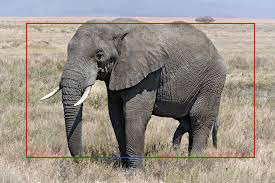

In [84]:
from PIL import ImageDraw
draw = ImageDraw.Draw(img)
draw.line([(x,y), (x, y+h), (x+w, y+h), (x+w, y), (x,y)], fill="red", width=1)

img

# 코드 종합

In [ ]:
# API 호출 변수 및 필요한 것들 import
import numpy as np
import os
import sys
import requests
from PIL import ImageDraw

client_id = "2ir1oc6imp"
client_secret = "4FIE6xUWDjlFocSUHZw5MjdX1smM733YzIlwBMxk"
url = "https://naveropenapi.apigw.ntruss.com/vision-obj/v1/detect"
headers = {'X-NCP-APIGW-API-KEY-ID': client_id, 'X-NCP-APIGW-API-KEY': client_secret }

In [96]:
# Object Detection 함수

def ObjectDetection(filename):
    # 1. 파일을 불러온 뒤 OD 결과 반환(response)
    files = {'image': open(filename, 'rb')}
    response = requests.post(url,  files=files, headers=headers)
    rescode = response.status_code
    if(rescode==200):
    # 2. 결과를 딕셔너리로 변환
        dict = eval(response.text)
        score = dict['predictions'][0]['detection_scores']  # 디텍션 점수중 제일 높은 것 찾기
        count = np.argmax(score)        # count = 제일 높은 점수의 위치
        coord = dict['predictions'][0]['detection_boxes'][count]    # 제일 높은 점수를 받은 객체의 좌표
        img = Image.open(filename)
        x = (coord[0] * img.size[0])
        y = (coord[1] * img.size[1])
        w = (coord[2] - coord[0]) * img.size[0]
        h = (coord[3] - coord[1]) * img.size[1]
        draw = ImageDraw.Draw(img)
        draw.line([(x,y), (x, y+h), (x+w, y+h), (x+w, y), (x,y)], fill="red", width=1)
    return(img)

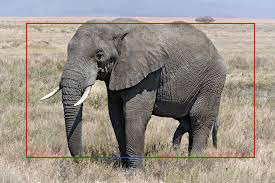

In [97]:
ObjectDetection('/content/drive/MyDrive/Data/코끼리.jpg')